### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


### Loading Dataset

In [3]:
# # Loading the dataset and perform splitting
# data_list = []
# labels_list = []
# classes_list = 43

# imgs_path = "../input/gtsrb-german-traffic-sign/Train"
# for i in range(classes_list):
#     i_path = os.path.join(imgs_path, str(i)) #0-42
#     for img in os.listdir(i_path):
#         im = Image.open(i_path +'/'+ img)
#         im = im.resize((32,32))
#         im = np.array(im)
#         data_list.append(im)
#         labels_list.append(i)
# data = np.array(data_list)
# labels = np.array(labels_list)

In [2]:
# Opening file for reading in binary mode
#- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization
with open('D:\Project\Traffic Sign Detection\DATABASE/data3.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

train_imgs = data['x_train']
test_imgs = data['x_test']
valid_imgs = data['x_validation']
train_labels = data['y_train']
test_labels = data['y_test']
valid_labels = data['y_validation']

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    plt.imshow(image1)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

In [26]:
ima

(32, 32, 3)



#new = augment_brightness_camera_images(image)
new = preprocess_img(image)
#plt.imshow(new)
print(new.shape)
print(cycle)

In [3]:
indx = np.array(np.where(train_labels <= 10)) #cycle
indx = np.concatenate((indx ,np.where(train_labels >= 32)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(train_labels == 15)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(train_labels == 16)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(train_labels == 17)), axis = 1) #cycle

indx1 = np.array(np.where(test_labels <= 10)) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels >= 32)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels == 15)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels == 16)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels == 17)), axis = 1) #cycle

indx2 = np.array(np.where(valid_labels <= 10)) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels >= 32)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels == 15)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels == 16)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels == 17)), axis = 1) #cycle

cycle_train_imgs = train_imgs[indx]
cycle_test_imgs = test_imgs[indx1]
cycle_valid_imgs = valid_imgs[indx2]
cycle_train_labels = train_labels[indx]
cycle_test_labels = test_labels[indx1]
cycle_valid_labels = valid_labels[indx2]


In [4]:
cy_Dict = {0:0 ,1:1 ,2:2, 3:3 , 4:4 , 5:5 , 6:6 , 7:7 , 8:8 , 9:9 ,10:10 ,15:11 , 16:12 , 17:13 , 32:14 , 33:15 , 34:16 , 35:17 , 36:18 , 37:19 , 38:20 , 39:21 , 40:22 , 41:23 , 42:24 }
cycle_train_labels = np.vectorize(cy_Dict.get)(cycle_train_labels)
cycle_test_labels = np.vectorize(cy_Dict.get)(cycle_test_labels)
cycle_valid_labels = np.vectorize(cy_Dict.get)(cycle_valid_labels)
cy_num_class = 25

In [31]:
cycle_train_imgs[0].shape

(50575, 32, 32, 3)

from skimage import color, exposure, transform

NUM_CLASSES = 43
IMG_SIZE = 48

def preprocess_img(img):
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

#     # central square crop
#     min_side = min(img.shape[:-1])
#     centre = img.shape[0]//2, img.shape[1]//2
#     img = img[centre[0]-min_side//2:centre[0]+min_side//2,
#     centre[1]-min_side//2:centre[1]+min_side//2,
#                   :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

### Image Data Preprocessing

In [5]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = cycle_train_imgs[0]
x_test = cycle_test_imgs[0]
x_valid = cycle_valid_imgs[0]

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 43

# One Hot Encoding
y_train = keras.utils.to_categorical(cycle_train_labels[0], 25)
y_test = keras.utils.to_categorical(cycle_test_labels[0], 25)
y_valid = keras.utils.to_categorical(cycle_valid_labels[0], 25)

In [16]:
# a, x_train, b, y_train = train_test_split(x_train, y_train, test_size=0.36, random_state=42)

# for i in x_train:
#     i = cv2.resize(i,(48,48))

In [17]:
# for i in x_valid:
#     i = cv2.resize(i,(48,48))
    
# for i in x_test:
#     i = cv2.resize(i,(48,48))

In [16]:
keras.backend.clear_session()

### LeNet Model Architecture

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(25, activation='softmax'))

In [7]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=128, epochs=70, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/70
396/396 [==============================] - 13s 25ms/step - loss: 0.8776 - accuracy: 0.7352 - val_loss: 0.1717 - val_accuracy: 0.9404
Epoch 2/70
396/396 [==============================] - 9s 24ms/step - loss: 0.1470 - accuracy: 0.9564 - val_loss: 0.1342 - val_accuracy: 0.9567
Epoch 3/70
396/396 [==============================] - 10s 24ms/step - loss: 0.0916 - accuracy: 0.9723 - val_loss: 0.0737 - val_accuracy: 0.9723
Epoch 4/70
396/396 [==============================] - 10s 24ms/step - loss: 0.0660 - accuracy: 0.9802 - val_loss: 0.0965 - val_accuracy: 0.9674
Epoch 5/70
396/396 [==============================] - 10s 24ms/step - loss: 0.0564 - accuracy: 0.9828 - val_loss: 0.1472 - val_accuracy: 0.9677
Epoch 6/70
396/396 [==============================] - 10s 24ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.1613 - val_accuracy: 0.9635
Epoch 7/70
396/396 [==============================] - 9s 24ms/step - loss: 0.0461 - accuracy: 0.9852 - val_loss: 0.0900 - val_accuracy: 0

In [9]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

255/255 [==============================] - 2s 6ms/step - loss: 0.1945 - accuracy: 0.9822
Test Loss: 0.1944720596075058
Test accuracy: 0.9822303652763367


In [10]:
from sklearn.metrics import classification_report
pred = model.predict(x_test).argmax(axis = 1)
cr = classification_report(y_test.argmax(axis = 1) , pred , output_dict = True)
print(cr)

255/255 [==============================] - 1s 4ms/step
{'0': {'precision': 0.9523809523809523, 'recall': 1.0, 'f1-score': 0.975609756097561, 'support': 60}, '1': {'precision': 0.9793956043956044, 'recall': 0.9902777777777778, 'f1-score': 0.9848066298342542, 'support': 720}, '2': {'precision': 0.9827357237715804, 'recall': 0.9866666666666667, 'f1-score': 0.9846972721224218, 'support': 750}, '3': {'precision': 0.96875, 'recall': 0.9644444444444444, 'f1-score': 0.9665924276169264, 'support': 450}, '4': {'precision': 0.9908814589665653, 'recall': 0.9878787878787879, 'f1-score': 0.9893778452200302, 'support': 660}, '5': {'precision': 0.9543307086614173, 'recall': 0.9619047619047619, 'f1-score': 0.958102766798419, 'support': 630}, '6': {'precision': 0.9788732394366197, 'recall': 0.9266666666666666, 'f1-score': 0.952054794520548, 'support': 150}, '7': {'precision': 0.9931818181818182, 'recall': 0.9711111111111111, 'f1-score': 0.9820224719101124, 'support': 450}, '8': {'precision': 0.990950226

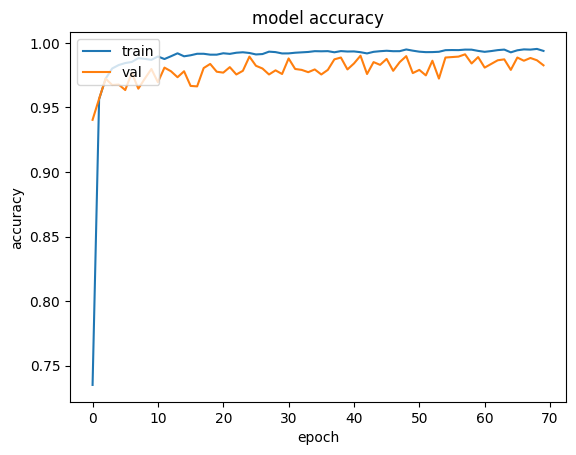

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

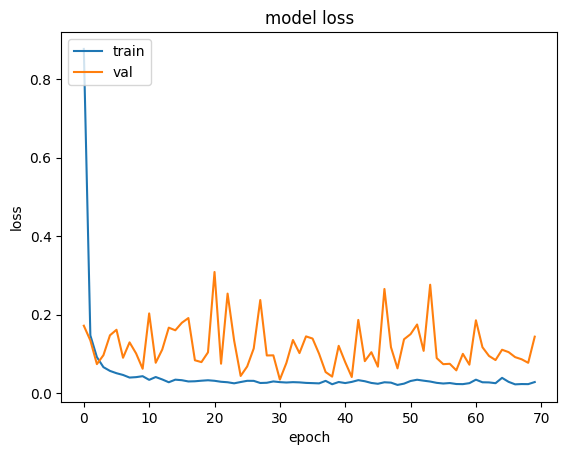

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
model.count_params()

474137

In [13]:
model_save_dir = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\circle_classifier_data0_acc98.h5"  

model.save(model_save_dir)


In [97]:
x_test[1].shape

(32, 32, 3)

## Hope you like it!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


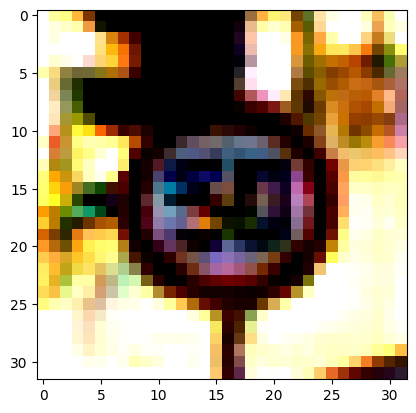

1/1 [==============================] - 0s 336ms/step
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [17]:
from matplotlib import pyplot as plt
image = x_train[65:66,:,:]#.transpose(2 , 0 ,1)
plt.imshow(image[0].reshape((32,32,3)))
plt.show()
#y = model.predict_classes(image)
y = (model.predict(image) > 0.5).astype("int32")
print(y[0])
print(y_train[65:66])

In [ ]:
image[0].reshape((32,32)).shape

In [ ]:
import numpy
x = numpy.where(gray_train_labels == 2)